# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"

data = pd.read_csv(file_path)

data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [2]:
# Check for missing values in the dataset
print(data.isnull().any())

# Get the shape of the dataset (number of rows and columns)
print("shape:", data.shape)

# Get a summary of the dataset
print("describe:", data.describe())

# Get information about the dataset, including data types and non-null counts
print("info:", data.info())


fips                      False
TOT_POP                   False
0-9                       False
0-9 y/o % of total pop    False
19-Oct                    False
                          ...  
CKD_prevalence            False
CKD_Lower 95% CI          False
CKD_Upper 95% CI          False
CKD_number                False
Urban_rural_code          False
Length: 108, dtype: bool
shape: (3140, 108)
describe:                fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.9518

In [3]:
#dropping all columns that dont relate to heart disease
columns_to_drop = ['fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 
    'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 
    'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 
    'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 
    'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18', 
    'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 
    'Unemployed_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 
    'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 
    'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 
    'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 
    'Total Population','Urban_rural_code']

# Drop the columns
new_data = data.drop(columns=columns_to_drop)

new_data.columns


Index(['TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop',
       '60-69', '60-69 y/o % of total pop', '70-79',
       '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bach

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X = new_data.drop('Heart disease_prevalence', axis=1)
y = new_data['Heart disease_prevalence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
mse_sqrt = np.sqrt(mse)
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mse)
print("sqrt_mean_squared_error", mse_sqrt)



Linear Regression R^2: 0.982576036412511
Linear Regression MSE: 0.05621341307521175
sqrt_mean_squared_error 0.23709367995628172


In [5]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R^2: 0.9669677734710564
Lasso Regression MSE: 0.10656898961834123


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.895e+02, tolerance: 7.676e-01
  model = cd_fast.enet_coordinate_descent(


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.895e+02, tolerance: 7.676e-01
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.530e+02, tolerance: 7.676e-01
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

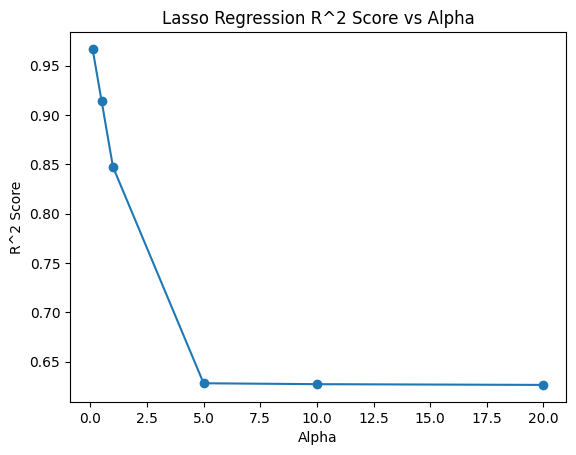

In [6]:
# Plot R^2 for different alpha values in Lasso
alphas = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
r2_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, lasso.predict(X_test)))

plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression R^2 Score vs Alpha')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Lasso Regression
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]}
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Use the best model for predictions
best_lasso = grid_search.best_estimator_
y_pred_best_lasso = best_lasso.predict(X_test)
print("Optimized Lasso Regression R^2:", r2_score(y_test, y_pred_best_lasso))
print("Optimized Lasso Regression MSE:", mean_squared_error(y_test, y_pred_best_lasso))


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.308e+02, tolerance: 6.154e-01
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.296e+02, tolerance: 6.194e-01
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

Best Hyperparameters: {'alpha': 0.1}
Best R^2 Score: 0.9560197045374956
Optimized Lasso Regression R^2: 0.9669677734710564
Optimized Lasso Regression MSE: 0.10656898961834123


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+03, tolerance: 6.095e-01
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+03, tolerance: 6.155e-01
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

In [10]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
y_predict = ridge_model.predict(X_test)

y_predict

array([ 9.2736614 ,  6.43780735, 12.79480588,  7.59461716,  6.17027735,
        7.06480593,  7.69386395, 12.62916711,  8.4524078 ,  5.46732492,
        8.42535831, 11.79627478,  5.55188552, 10.76002755,  6.98637919,
        8.71832482,  7.11532916,  8.80801429, 10.82489528,  8.87647675,
        9.26403189,  8.72644712,  7.66409607,  9.63848517,  6.66484455,
        5.89861364,  5.26508243,  8.24354041,  8.10950964, 10.37454177,
       11.77542379,  9.49825228,  9.80705661,  8.90815549,  7.11306055,
       10.56769937,  8.72395227,  7.37050349,  8.18056797,  5.69507919,
       10.15543526,  5.67346851,  8.56663737,  8.85953009,  7.11335886,
       10.30010567,  9.56911994,  9.89190464, 10.60654101, 12.90300223,
       11.2211141 , 13.57487285,  6.60704066, 10.08877256,  7.70113544,
        9.76527792,  6.78944968,  6.36067086,  8.99047672,  9.01497789,
        6.19135155, 11.23188937,  9.91986712,  7.19804453,  7.82037628,
        6.78550265,  8.49693893, 10.10654025,  9.50107425,  7.04

In [11]:
# Define model
model = Ridge()

# Define parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = best_model.score(X_test, y_test)
sqrt = np.sqrt(test_mse)
#print(f"Best Parameters: {best_params}")
print(f"Test MSE: {test_mse}")
print(f"Test R^2 Score: {test_r2}")
print(f"sqrt of mse: {sqrt}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ........................................

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.38838e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.09206e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.79559e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.98365e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vscode/.local/lib/python3.10/site-packages/skl